In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

Using TensorFlow backend.


In [2]:
df = yf.download("AAPL", start="2016-01-01", end="2021-10-09")

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.323219,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.713696,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.249626,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.268383,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.386133,283192000


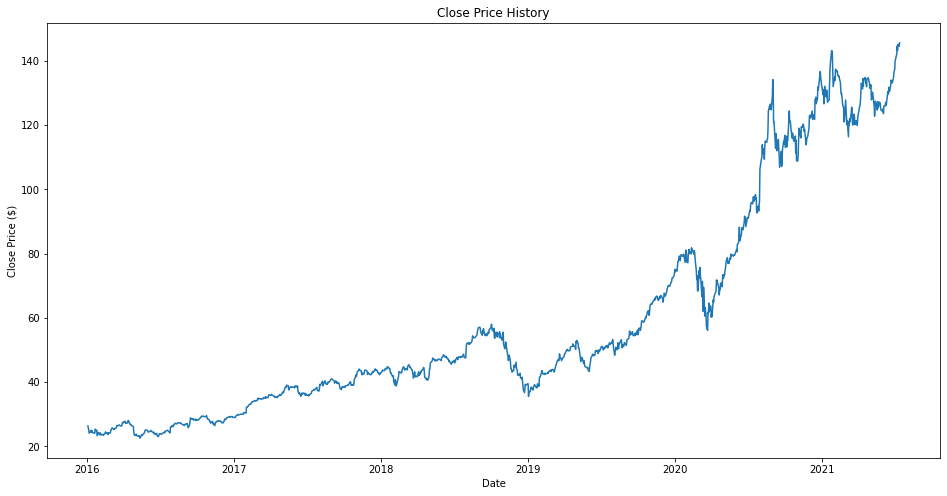

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.show()

In [5]:
forecast_out = 30
df['Predictions'] = df['Adj Close'].shift(-forecast_out)
df = df[['Adj Close', 'Predictions']]
df.tail()

,Adj Close,Predictions
Date,,
2021-07-07,144.570007,NaN
2021-07-08,143.240005,NaN
2021-07-09,145.110001,NaN
2021-07-12,144.500000,NaN
2021-07-13,145.639999,NaN


In [6]:
X = df.drop(['Predictions'], axis=1)
X = X[:-forecast_out]
X.tail()

,Adj Close
Date,
2021-05-24,127.099998
2021-05-25,126.900002
2021-05-26,126.849998
2021-05-27,125.279999
2021-05-28,124.610001


In [7]:
y = df['Predictions']
y = y[:-forecast_out]
y.tail()

Date
2021-05-24    144.570007
2021-05-25    143.240005
2021-05-26    145.110001
2021-05-27    144.500000
2021-05-28    145.639999
Name: Predictions, dtype: float64

In [8]:
print(X.shape, y.shape)

(1361, 1) (1361,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 57.664346359234735
R-squared (R2 ): 0.9521269578475658


In [13]:
predictions = model.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [59.34919639 36.55786575 24.49366447 40.02923019 48.60182529 93.80142865
 68.97712746 82.11183626 83.05551846 64.04069003]
First 10 Actual labels: [72.60293579101562, 37.402244567871094, 22.57691764831543, 37.33646011352539, 53.29182434082031, 114.44621276855469, 78.31129455566406, 62.976531982421875, 96.40789794921875, 78.22541046142578]


In [14]:
pd.DataFrame({"Actual": y_test, "Prediction": predictions})

,Actual,Prediction
Date,,
2020-03-20,72.602936,59.349196
2017-06-20,37.402245,36.557866
2016-06-13,22.576918,24.493664
2017-09-08,37.336460,40.029230
2018-07-17,53.291824,48.601825
...,...,...
2020-08-19,116.217491,119.116242
2021-03-30,122.769997,123.781881
2017-08-31,37.513294,41.343170


In [15]:
df2 = yf.download("AMZN", start="2016-01-01", end="2021-10-09")
df2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,656.289978,657.719971,627.510010,636.989990,636.989990,9314500
2016-01-05,646.859985,646.909973,627.650024,633.789978,633.789978,5822600
2016-01-06,622.000000,639.789978,620.309998,632.650024,632.650024,5329200
2016-01-07,621.799988,630.000000,605.210022,607.940002,607.940002,7074900
2016-01-08,619.659973,624.140015,606.000000,607.049988,607.049988,5512900
...,...,...,...,...,...,...
2021-07-07,3717.379883,3734.199951,3678.909912,3696.580078,3696.580078,5328100
2021-07-08,3643.560059,3759.989990,3621.120117,3731.409912,3731.409912,5180600
2021-07-09,3722.520020,3748.000000,3693.399902,3719.340088,3719.340088,3745100


In [16]:
forecast_out = 30
df2['Predictions'] = df2['Adj Close'].shift(-forecast_out)
df2 = df2[['Adj Close', 'Predictions']]
df2.tail()

,Adj Close,Predictions
Date,,
2021-07-07,3696.580078,NaN
2021-07-08,3731.409912,NaN
2021-07-09,3719.340088,NaN
2021-07-12,3718.550049,NaN
2021-07-13,3677.360107,NaN


In [17]:
X2 = df2.drop(['Predictions'], axis=1)
X2 = X2[:-forecast_out]
X2.tail()

,Adj Close
Date,
2021-05-24,3244.989990
2021-05-25,3259.050049
2021-05-26,3265.159912
2021-05-27,3230.110107
2021-05-28,3223.070068


In [18]:
y2 = df2['Predictions']
y2 = y2[:-forecast_out]
y2.tail()

Date
2021-05-24    3696.580078
2021-05-25    3731.409912
2021-05-26    3719.340088
2021-05-27    3718.550049
2021-05-28    3677.360107
Name: Predictions, dtype: float64

In [19]:
predictions = model.predict(X2)
pd.DataFrame({"Prediction": predictions, "Actual": y2})

,Prediction,Actual
Date,,
2016-01-04,653.478481,534.099976
2016-01-05,650.201741,525.000000
2016-01-06,649.034455,534.900024
2016-01-07,623.731953,559.500000
2016-01-08,622.820598,552.940002
...,...,...
2021-05-24,3324.011274,3696.580078
2021-05-25,3338.408455,3731.409912
2021-05-26,3344.664816,3719.340088


In [20]:
df2 = yf.download("AMZN", start="2016-01-04", end="2016-02-05")
df2.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-29,571.979980,593.000000,570.000000,587.000000,587.000000,14677600
2016-02-01,578.150024,581.799988,570.309998,574.809998,574.809998,6355100
2016-02-02,570.000000,571.559998,550.090027,552.099976,552.099976,6312000
2016-02-03,553.500000,556.000000,521.900024,531.070007,531.070007,10048700
2016-02-04,525.000000,538.989990,519.219971,536.260010,536.260010,6199100


In [21]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

In [1]:
import pickle
model = pickle.load(open('model.pkl', 'rb'))

In [4]:
df2 = yf.download("AMZN", start="2016-01-01", end="2021-10-09")
df2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,656.289978,657.719971,627.510010,636.989990,636.989990,9314500
2016-01-05,646.859985,646.909973,627.650024,633.789978,633.789978,5822600
2016-01-06,622.000000,639.789978,620.309998,632.650024,632.650024,5329200
2016-01-07,621.799988,630.000000,605.210022,607.940002,607.940002,7074900
2016-01-08,619.659973,624.140015,606.000000,607.049988,607.049988,5512900
...,...,...,...,...,...,...
2021-07-16,3633.310059,3646.060059,3570.459961,3573.629883,3573.629883,4038400
2021-07-19,3532.580078,3550.209961,3499.159912,3549.590088,3549.590088,3784600
2021-07-20,3567.320068,3592.000000,3518.000000,3573.189941,3573.189941,3251900


In [5]:
forecast_out = 30
df2['Predictions'] = df2['Adj Close'].shift(-forecast_out)
df2 = df2[['Adj Close', 'Predictions']]
df2.tail()

,Adj Close,Predictions
Date,,
2021-07-16,3573.629883,NaN
2021-07-19,3549.590088,NaN
2021-07-20,3573.189941,NaN
2021-07-21,3585.199951,NaN
2021-07-22,3638.030029,NaN


In [6]:
X2 = df2.drop(['Predictions'], axis=1)
X2 = X2[:-forecast_out]
X2.tail()

,Adj Close
Date,
2021-06-03,3187.010010
2021-06-04,3206.219971
2021-06-07,3198.010010
2021-06-08,3264.110107
2021-06-09,3281.149902


In [7]:
y2 = df2['Predictions']
y2 = y2[:-forecast_out]
y2.tail()

Date
2021-06-03    3573.629883
2021-06-04    3549.590088
2021-06-07    3573.189941
2021-06-08    3585.199951
2021-06-09    3638.030029
Name: Predictions, dtype: float64

In [8]:
predictions = model.predict(X2)
df3 = pd.DataFrame({"Prediction": predictions, "Actual": y2})

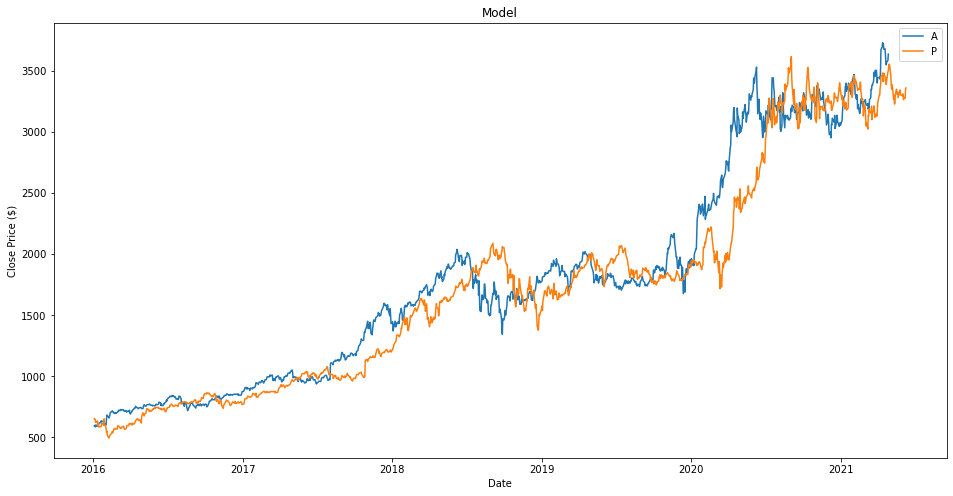

In [21]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.plot(y2.shift(-30))
plt.plot(df3['Prediction'])
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend("AP")
plt.show()